# Introduction to Qiskit

Reference: This notebook is a modified version of the tutorial from [IBM Quantum Challenge 2024](https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_0/lab-0.ipynb)

# Table of Contents
* [Getting started](#start)
  * [Install Qiskit](#install)
  * [Troubleshoot](#troubleshoot)
* [Generate a two-qubit Bell state using Qiskit patterns](#generate)
  * [Step 1: Map circuits and operators](#step-1)
    * [Exercise 1](#ex-1)
  * [Step 2: Optimize the circuit](#step-2)
  * [Step 3: Execute the circuit](#step-3)
  * [Step 4: Post-process the results](#step-4)
* [Congratulations](#congrats)

# Getting Started <a name="start"></a>
The name "Qiskit" is a general term referring to a collection of software for executing programs on quantum computers. Most notably among these software tools is the open-source Qiskit SDK, and the runtime environment:

1. Qiskit SDK (Software Development Kit):
This is the core, open-source component of Qiskit. It provides developers with the tools necessary to create and manipulate quantum circuits, and to interact with quantum systems.

2. Qiskit Runtime:
This is the execution environment that allows you to run your quantum programs on actual quantum hardware. Specifically, it enables access to IBM's quantum processing units (QPUs).

In this workshop, we'll gain hands-on experience with the workflow of constructing and executing quantum circuits using both the Qiskit SDK and Qiskit Runtime.

## Install Qiskit <a name="install"></a> :

Before we begin our exploration of Qiskit's general workflow, we need to ensure that Qiskit is properly installed in your working environment.
Qiskit can be used in various settings, including:

- Local Jupyter notebooks
- Cloud-based platforms (e.g., Google Colab, qBraid)
- Integrated Development Environments (IDEs)
- Command line interfaces

Regardless of your chosen environment, installing Qiskit is the first crucial step in our workshop.

For this tutorial, we'll be using the latest Qiskit version 1.2.4. The following cells contain the necessary installation commands. Please run the appropriate command based on your working environment.

If you would prefer to follow a video guide on how to install and run Qiskit *locally* later after this tutorial, [watch this video to walk you through every step of the process](https://www.youtube.com/watch?v=dZWz4Gs_BuI).

In [1]:
### Install Qiskit SDK 1.0 or later###
%pip install qiskit

###Install the other required packages as well###
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service

  Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl.metadata (13 kB)
  Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl.metadata (10 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached dill-0.3.9-py3-none-any.whl.metadata (10 kB)
  Using cached stevedore-5.4.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached pbr-6.1.1-py2.py3-none-any.whl.metadata (3.4 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached qiskit-1.3.2-cp39-abi3-win_amd64.whl (6.5 MB)
Using cached dill-0.3.9-py3-none-any.whl (119 kB)
   ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
   ------------ --------------------------- 4.2/12.9 MB 25.2 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.9 MB 30.8 MB/s eta 0:00:01
   ---------------------------------------- 12.9/12.9 MB 25.3 MB/s eta 0:00:00
Using cached rustworkx-0.16.0-cp39-abi3-win_amd64.whl (2.0 MB)
   ---------------------------------------- 0.0/43.9 MB ? eta -:-

After installing the required packages, you may need to restart the kernel in order to run them.

Now, let's test to make sure everything is working properly. We've provided some very basic Qiskit code for you in the following cell. This code will create a quantum circuit, apply a single gate, and then draw that circuit. Run the cell below to make sure your system is set up properly.

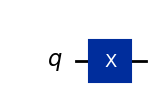

In [2]:
from qiskit import QuantumCircuit

# Create a new circuit with a single qubit
qc = QuantumCircuit(1)

# Add a Not gate to qubit 0
qc.x(0)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

You should see something similar to this as an output:

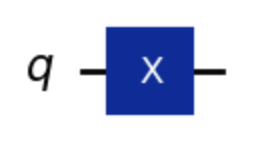

For the record, you'll probably see this error at the end of installs: `ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.`

It is safe to ignore that particular error.

If everything else installed, then you're all set to begin working with Qiskit! In the next section, we'll dive into [creating and running our first quantum program.](#generate)


### Troubleshoot <a name="troubleshoot"></a>

Not working quite yet? Let's check your installs and versions to make sure everything is what it should be.

In [3]:
### CHECK QISKIT VERSION
import qiskit
qiskit.__version__

'1.3.2'

You should have a Qiskit version higher than v1.0.2 installed. If you see a version lower than that, you'll need to restart your kernel and reinstall the more recent Qiskit version.


Other common issues could be solved by the following:

*   If you aren't seeing any output, make sure you've run each code cell.
*   Try restarting your kernel. How you do this varies by the environment you're using.


If you're still running into problems, raise your hand and our tutorial TA will come to assist you 😃.   


If you experience any installation issues later when you explore on your own, check out this [Coding with Qiskit](https://www.youtube.com/watch?v=dZWz4Gs_BuI) video for additional tips, or explore [the documentation](https://docs.quantum.ibm.com/start/install) for help.

# Generate a two-qubit Bell state using Qiskit patterns <a name="generate"></a>

Our goal in this lab is to generate a two-qubit Bell state using the approach provided by **Qiskit patterns.**

A Qiskit pattern is a four step workflow for setting up, running, and getting results from a quantum computer. This is the workflow designed to help you use utility-scale quantum computers. It works as follows:

1. Map circuits and operators
2. Optimize the circuit
3. Execute the circuit
4. Post-process the results

patterns.svg

In [4]:
### Imports

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

##  Step 1: Map circuits and operators <a name="step-1"></a>

Mapping your problem to circuits and operators is fairly easy when you're only dealing with a handful of qubits, but can get more difficult as you scale up.

Let's start with a fundamental example: constructing a Bell state.
The Bell state is a quintessential quantum example that demonstrates entanglement between two qubits. Here's how we create it:

1. Apply a Hadamard gate to qubit 0:
This puts the qubit into a superposition state.
2. Apply a CNOT (Controlled-NOT) gate between qubits 0 and 1:
This operation entangles our two qubits.

The result of this circuit is that our two qubits become entangled, meaning that when we measure the output, we should expect to see both qubits sharing the same measurement result.

This example serves as a great starting point for understanding how to construct quantum circuits. As we progress through the workshop, we'll build on this foundation to explore more complex quantum operations and algorithms.

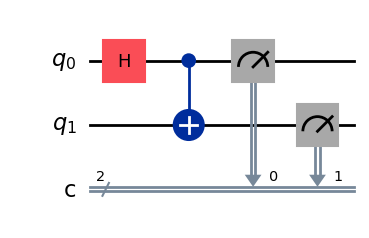

In [5]:
# Create a new circuit with 2 quantum qubits and 2 classical bits for storing measurement results
qc = QuantumCircuit(2, 2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a CNOT gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Map the output of the two qubits to the two classical measurement bits respectively
qc.measure([0, 1], [0, 1])

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
qc.draw("mpl")

This will entangle the two qubits such that the combined state becomes:

$$\frac{|00\rangle + |11\rangle}{\sqrt{2}}$$

### Expected Outcomes:
For our Bell state, because we've created an entangled state, we expect to see approximately equal probabilities of measuring the two states |00⟩ and |11⟩



## Step 2: Optimize the circuit <a name="step-2"></a>

A Qiskit pattern is the best framework for working with a quantum computer at *utility scale* — the point where quantum computers can perform reliable computations at a scale beyond brute force classical computing methods. These computations can use hundreds of qubits. However, in this intro section, we're only using two qubits. So, that means we do not need to do any work here to optimize the circuit.

To optimize the circuit, we can use the Qiskit transpiler. During transpilation, we can optimally layout our qubits to minimize the required number of gates. To learn more about Qiskit Transpiler, you can check out [this video](https://www.youtube.com/watch?v=MvX5OUK-tbE) and [qiskit documentation](https://docs.quantum.ibm.com/api/qiskit/transpiler). For now, we'll move on to the next step of the pattern - **execution**.

## Step 3: Execute the circuit <a name="step-3"></a>

Now that we've got our quantum circuit all set up -- now comes the fun part! Let's execute the circuit and see what resulting states we end up with. In this step, we'll introduce a powerful tool: Qiskit Runtime.
Qiskit Runtime provides an efficient way to run quantum circuits on real quantum hardware or advanced simulators. You might be itching to try this on a real quantum computer, but running on actual quantum hardware requires an IBM account, and we are not going to dive into that just yet. For now, we'll stick with a simulator. In our next notebook, we'll also have a chance to see how different simulator behave.

Here's how we'll run our circuit:

1. **Set up the simulator**: The `AerSimulator` supports a variety of simulation methods and configuration, for this example, we'll just use the default one and use it to run ideal (noise free).
2. **Transpile the circuit for the simulator**:  This steps translates our quantum circuit into a language our simulator can understand. It's like converting a recipe to match the appliances in your kitchen.
3. **Run the Experiment**: Finally, we run the simulation 1000 times and collect the results.

In [6]:
# Initialize a simulator object
backend = AerSimulator()
 
# Transpile/Prepare the circuit for the simulator
qc_compiled = transpile(qc, backend)

# Run the simulation 1000 times
job = backend.run(qc_compiled, shots=1000)

# Collect results
result = job.result()
counts = result.get_counts(qc_compiled)
print("Measurement outcomes:", counts)

Measurement outcomes: {'00': 511, '11': 489}


## Step 4: Post-process the results <a name="step-4"></a>

The last step of Qiskit patterns is where we process, analyze, and visualize the results of our job.

There are many ways you can choose to do this. Here we simply visualize the frequency distribution of the measured states

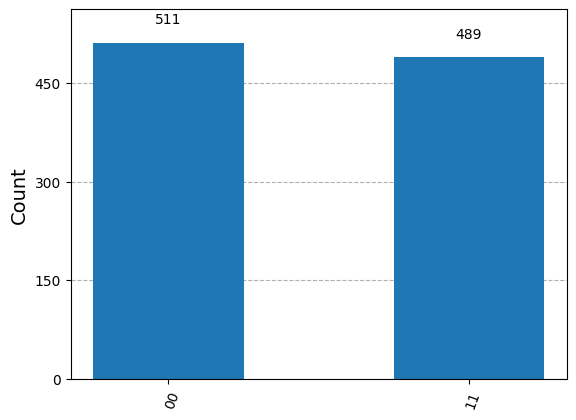

In [7]:
plot_histogram(counts)

You *should* see approximately equal counts for the states '00' and '11'. This shows that your circuit is entangled. Great work!

# Congratulations! 🙌🎊 <a name="congrats"></a>

Congratulations on completing this tutorial on the Qiskit workflow!
Let's recap what you've accomplished:

1. You've learned how to follow the Qiskit workflow to set up, optimize, run, and process a quantum circuit.
2. You've successfully created a two-qubit Bell state, a fundamental quantum state demonstrating entanglement.
3. You've visualized the frequency distribution of your quantum state, confirming the entanglement.

Now that you've mastered the basics, it's time to take your quantum programming skills to the next level😀. In the next part of our tutorial, we'll dive into implementing a real quantum algorithm -- Grover's search -- and see how it demonstrates a quadratic speedup over classical search algorithms.